labels 60000
centroids [[  166.07857124   947.60459426]
 [  928.1501715   -486.17902973]
 [  261.8074617   -779.26911563]
 [ -727.99323602  -877.7976624 ]
 [ -780.74821077   161.46295145]
 [ -660.59337483  1139.02532184]
 [ 1957.23464203  -368.3486435 ]
 [ -162.26036272  -226.49603434]
 [-1329.57040957  -553.26603904]
 [  347.89474744  1043.26365709]]


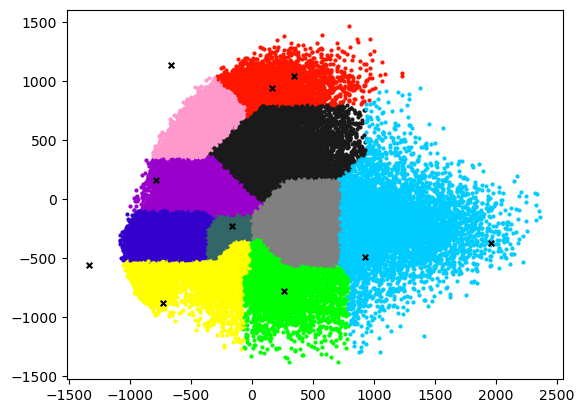

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def get_distances(X, k):
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False), :]
    
    distances = np.zeros([X.shape[0], centroids.shape[0]])
    for i, x in enumerate(X):
        for j, centroid in enumerate(centroids):
            b = sum(np.sqrt((x - centroid)**2))
            distances[i][j] = b
    
    return distances

# 定义k-means聚类函数
def k_means(X, k, max_iters):
    n_samples, n_features = X.shape
    
    # 随机初始化聚类中心, centroids聚类中心
    centroids = X[np.random.choice(n_samples, k, replace=False), :]
    
    labels = []

    # 迭代更新聚类中心
    for i in range(max_iters):
        # 计算每个样本到聚类中心的距离
        distances = get_distances(X, k)

        # 分配每个样本到最近的聚类中心
        # labels存储的是每个样本离的最近的聚类中心的索引
        # labels的索引相当于每个样本的索引
        labels = []
        for i, distance in enumerate(distances):
            d = 0x3f3f3f3f
            index = 0
            for j, dist in enumerate(distance):
                if dist < d:
                    index = j
                    d = dist
            labels.append(index)

        # 更新聚类中心
        centroids = updataCenterIds(k, labels, centroids)

    return labels, centroids

def updataCenterIds(k, labels, centroids):
    # 做优化时间复杂度为O(X.shape[0])
    items = []

    for i in range(k):
        items.append([])
        
    for i, label in enumerate(labels):
        items[label].append(X[i])
    
    for i in range(k):
        centroids[i] = np.sum(items[i], axis=0) / len(items[0])

    # 这个版本时间复杂度为O(k*X.shape[0])
    # for i in range(k):
    #     # 存储到这个聚类中心最近的样本
    #     min_pointer = []
    #     for j, label in enumerate(labels):
    #         if label == i:
    #             min_pointer.append(X[j])
        
    #     centroids[i] = np.sum(min_pointer, axis=0) / len(min_pointer)

    return centroids

# 读取训练集数据
with open('./MNIST_data/train-images.idx3-ubyte', 'rb') as f:
    train_X = np.frombuffer(f.read(), dtype=np.uint8, offset=16).reshape(-1, 28*28)

pca =PCA(n_components =2)
pca.fit(train_X)
X=pca.transform(train_X)# 降维后的结果

k = 10

# lable表示每个样本距离最近的聚类中心shape(n_samples, )
# centroids聚类中心
labels, centroids = k_means(X, k, max_iters=100)
print("labels", len(labels))
print("centroids", centroids)

# #做数据可视化，先把数据降成2维，这样可以显示在平面上， 红 灰 荧光绿 黄 紫 粉 蓝 苔绿 深蓝 黑
colors = np.array(['#ff1500','#808080','#00FF00','#FFFF00','#9900CC','#FF99CC','#00CCFF','#336666','#3300CC','#1A1A1A'])
for i in range(X.shape[0]):
    plt.scatter(X[i][0], X[i][1], color = colors[labels[i]],marker='o',s=4)
for i in range(k):
    plt.scatter(centroids[i][0],centroids[i][1],color='black',marker='x',s=16)
